In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/mren5/capstone/main/diabetic_data.csv')

In [ ]:
#how does diabetes and other medical indicators impact readmission rates within hospitals?
#Review how medical indicators impact patient readmission in less than 30 days (insulin, number of diagnosis, a1c results, number of emergency)
#Why diabetes? Currently a registered dietitian and certified diabetes educator providing nutrition counseling and diabetes education for the long term managed care members and transistions of care team 
#Data source: https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#
#data location: UC Irvine Machine Learning Repository
#data description: 101766 rows, 50 columns

In [ ]:
#exploring the data
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#exploring the columns in the data 
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
#reviewing number of rows are in the dataset
num_rows =df.shape[0]

In [ ]:
print("Number of rows", num_rows)

Number of rows 101766


In [ ]:
#since this analysis will be focusing on readmission risks based on A1c results, number of diagnosis and number of emergency visits, we can take a subset of the original dataset below. 

df0=df.loc[:,[ 'race','gender', 'age','time_in_hospital', 'number_emergency', 'number_diagnoses', 'A1Cresult', 'insulin', 'readmitted']]
df0

,race,gender,age,time_in_hospital,number_emergency,number_diagnoses,A1Cresult,insulin,readmitted
0,Caucasian,Female,[0-10),1,0,1,None,No,NO
1,Caucasian,Female,[10-20),3,0,9,None,Up,>30
2,AfricanAmerican,Female,[20-30),2,0,6,None,No,NO
3,Caucasian,Male,[30-40),2,0,7,None,Up,NO
4,Caucasian,Male,[40-50),1,0,5,None,Steady,NO
...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,0,9,>8,Down,>30
101762,AfricanAmerican,Female,[80-90),5,0,9,None,Steady,NO
101763,Caucasian,Male,[70-80),1,0,13,None,Down,NO
101764,Caucasian,Female,[80-90),10,0,9,None,Up,NO


In [ ]:
#reviewing the data only for patients that were readmitted in less than 30 days
df1=df0.loc[(df0['readmitted']=='<30')]
df1

,race,gender,age,time_in_hospital,number_emergency,number_diagnoses,A1Cresult,insulin,readmitted
11,AfricanAmerican,Male,[60-70),7,0,7,None,Steady,<30
12,Caucasian,Female,[40-50),7,1,8,None,Down,<30
16,AfricanAmerican,Male,[50-60),4,0,8,None,Steady,<30
46,Caucasian,Female,[70-80),9,0,7,None,Down,<30
50,AfricanAmerican,Male,[50-60),4,0,9,None,No,<30
...,...,...,...,...,...,...,...,...,...
101699,Caucasian,Female,[80-90),4,0,9,None,Steady,<30
101727,Caucasian,Female,[70-80),2,0,9,None,Down,<30
101732,?,Female,[70-80),4,0,6,None,Steady,<30
101746,Caucasian,Male,[70-80),4,0,5,None,No,<30


In [ ]:
#cleaning data to replace all the ? with unknown instead
df2=df1.replace('?','Unknown')
df2['race'].unique()
df2

,race,gender,age,time_in_hospital,number_emergency,number_diagnoses,A1Cresult,insulin,readmitted
11,AfricanAmerican,Male,[60-70),7,0,7,None,Steady,<30
12,Caucasian,Female,[40-50),7,1,8,None,Down,<30
16,AfricanAmerican,Male,[50-60),4,0,8,None,Steady,<30
46,Caucasian,Female,[70-80),9,0,7,None,Down,<30
50,AfricanAmerican,Male,[50-60),4,0,9,None,No,<30
...,...,...,...,...,...,...,...,...,...
101699,Caucasian,Female,[80-90),4,0,9,None,Steady,<30
101727,Caucasian,Female,[70-80),2,0,9,None,Down,<30
101732,Unknown,Female,[70-80),4,0,6,None,Steady,<30
101746,Caucasian,Male,[70-80),4,0,5,None,No,<30


In [ ]:
#Number of patients who were readmitted by gender 
df_gender= df2.groupby(['gender'])['readmitted'].count().reset_index(name='count')
df_gender

,gender,count
0,Female,6152
1,Male,5205


In [ ]:
#Number of patients who were readmitted within 30 days of discharge by race 
df_race= df2.groupby(['race'])['readmitted'].count().reset_index(name='count')
df_race

,race,count
0,AfricanAmerican,2155
1,Asian,65
2,Caucasian,8592
3,Hispanic,212
4,Other,145
5,Unknown,188


In [ ]:
#analyze time spent in hosptial and number of diagnosis  
df1.mean()

time_in_hospital    4.768249
number_emergency    0.357313
number_diagnoses    7.692789
dtype: float64

In [ ]:
#review the unique results from a1c results column
df2=df1['A1Cresult'].unique()
df2

array(['None', 'Norm', '>8', '>7'], dtype=object)

In [ ]:
#analyze the number of patients that were readmitted in less than 30 days by A1c resutls
df_a1c=df1.groupby(['A1Cresult'])['readmitted'].count().reset_index(name='count')
df_a1c

,A1Cresult,count
0,>7,383
1,>8,811
2,None,9681
3,Norm,482


In [ ]:
#Analyze number of patients readmitted in less than 30 days by insulin usage
df_insulin=df1.groupby(['insulin'])['readmitted'].count().reset_index(name='count')
df_insulin

,insulin,count
0,Down,1698
1,No,4756
2,Steady,3433
3,Up,1470


In [ ]:
#analyzing A1c results, number of emergency room visits and number of diagnosis
df1.groupby(['A1Cresult']).mean()

,time_in_hospital,number_emergency,number_diagnoses
A1Cresult,,,
>7,5.569191,0.342037,7.827676
>8,5.415536,0.358816,7.545006
None,4.671108,0.359054,7.688359
Norm,4.993776,0.331950,7.923237


In [ ]:
#Analzying patients that were readmitted in less than 30 days by age group 
df_age= df1.groupby(['age'])['readmitted'].count().reset_index(name='count')
df_age

,age,count
0,[0-10),3
1,[10-20),40
2,[20-30),236
3,[30-40),424
4,[40-50),1027
5,[50-60),1668
6,[60-70),2502
7,[70-80),3069
8,[80-90),2078
9,[90-100),310


Text(0.5, 1.0, 'Re-admission Within 30 Days')

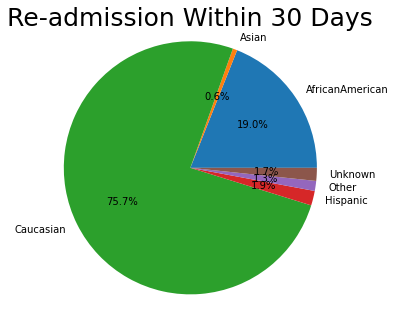

In [ ]:
#Pie chart that shows readmission within 30 days by race 

labels = df_race['race']
readmission = df_race['count']

plt.figure(figsize=(5,5))
plt.pie(readmission, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Re-admission Within 30 Days',fontsize = 25)


Text(0.5, 1.0, 'Re-admission Within 30 Days')

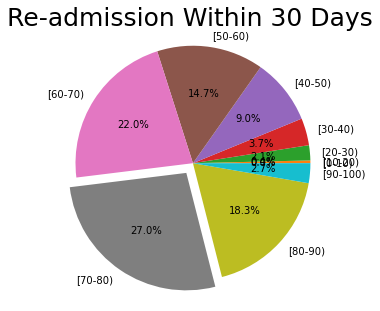

In [ ]:
#Pie chart that shows readmission within 30 days by age 
labels = df_age['age']
readmission = df_age['count']
explode = (0, 0, 0, 0, 0, 0, 0, 0.1, 0, 0)

plt.figure(figsize=(5,5))
plt.pie(readmission, explode = explode, labels = labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Re-admission Within 30 Days',fontsize = 25)


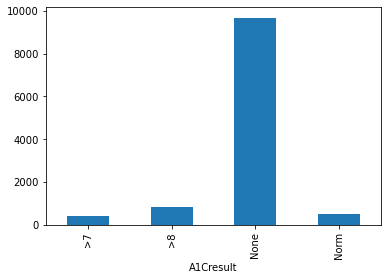

In [ ]:
#visualize number of readmission by A1c results 
df_a1c=df1.groupby(['A1Cresult'])['readmitted'].count().plot(kind='bar')


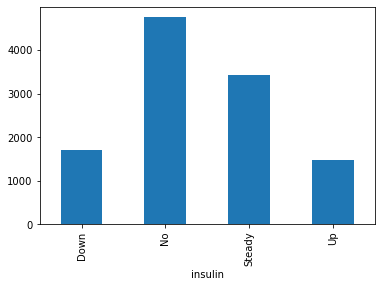

In [ ]:
#visualize number of readmission by insulin usage
df_insulin=df1.groupby(['insulin'])['readmitted'].count().plot(kind='bar')

CONCLUSION

There are more females readmitted to the hospital compared to men. 

More readmission for age groups 60+ to be readmitted within 30 days

The average number of medical diagnosis for patients with diabetes is 7 

Obtaining HgbA1c lab values for patients is a useful predictor of hospital readmission rates

Readmission differed significantly for those who did not have an A1c obtained compared to those wtih an A1c measurement 



